# STOR 566, Homework 2
### Instructor: Yao Li
### Keywords: SVM, MLP, CNN
### Due date: Sep 18, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

### **References:**

- You can follow the setup instructions at [here](https://pytorch.org/get-started/locally/).
- A useful tutorial on learning pytorch by examples at [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).
- More illustrations of different optimizers could be found [here](https://ruder.io/optimizing-gradient-descent/).
- Check Pytorch optimization methods at [here](https://pytorch.org/docs/stable/optim.html)
- Check Pytorch data augmentation options at [here](https://pytorch.org/vision/main/transforms.html).


### **Evaluation Metrics of Classifiers:**

- Average loss of an epoch: 
    \begin{align}
	  \frac{1}{B}\sum_{b=1}^B\sum_{d=1}^{D_b}\frac{loss(y_{bd}, f(x_{bd}))}{D_b}
	  \end{align}
    for each training epoch
    
    - $B$: the total number of batches
    - $D_b$: the number of observations in $b$-th batch
    - $f$: the model (Logistic regression or Linear SVM or MLP or CNN)
    - loss: logistic loss or the loss of linear SVM or cross-entropy
    - $(x_{bd}, y_{bd})$: the $d$-th pair of input data and label in $b$-th batch
    - An epoch is defined as one iteration over all observations in the training dataset

- Testing accuracy: 
	\begin{align}
	\frac{1}{N}\sum_{i=1}^N {\bf 1}(\hat{y}_i=y_i)
	\end{align}	
    - $N$: the total number of samples in the testing set
    - $y_i$: true label of sample $i$
    - $\hat{y}_i$: predicted label by the model

# Mikhal Ben-Joseph
I abided by the Honor Code while I completed this assignment. I worked together with Yesh Munagala and I utilized several internet resources which I listed along with Stack Overflow and the Pytorch documentation.

## Problem 1 (40 points)

In this problem you will practice implementing Linear SVM and Logistic Regression to classify **handwritten digit 0 and 1**.

**Data.** You will use MNIST digit classification dataset. Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. In this homework, you need two class, digit 0 and digit 1, for binary classification. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [1]:
## The following code can change the working directory to your google drive
## So you don't need to download the data every time

import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')


Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size = 64
data_dir = './data'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler


## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))


subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

### **Problem Description.**
### 1. (20 points) Implement **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [20]:
## Implementation of Logistic Regression
## You can insert more code chunks and text cells if you want to.
## Your code:

## A template is provided but you don't have to follow it:

num_epochs = 10

class LogisticLoss(torch.nn.Module):

 def __init__(self):
   super(LogisticLoss, self).__init__()

 def forward(self, y_predict, labels):
   # Minji told me in OH that I can write the loss function myself instead of using the sigmoid
   response = (torch.log(1+torch.exp(-labels * y_predict.t())))
   response = torch.mean(response)
   return response

# Training the Model

def hype_tune_logistic(num_epochs, lr, batch_size):
  print("")
  print(" >>>> Number of Epochs: ", num_epochs, " Learning Rate: ", lr, " Batch Size: ", batch_size, "<<<<")
  print("")

  ### Intantiating the model
  model = nn.Linear(28*28, 1)
  criterion = LogisticLoss()
  iter = 0
  losses = list()
  optimizer = optim.Adagrad(model.parameters(),lr=lr)

  for epoch in range(num_epochs):

      epoch_losses = list()

      # for i, (images, labels) in enumerate(train_loader):
      for (images, labels) in (train_loader):

          # Convert the 28*28 image matrix into a 784-dim vector
          images = images.view(-1, 28*28) 
          # Convert labels from 0,1 to -1,1
          labels = 2*(labels.float()-0.5)
          
          ## TODO 

          # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
          optimizer.zero_grad()
          y_predict = model(images)
          loss = criterion(y_predict, labels)
          
          # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch
          loss.backward()
          optimizer.step()
          
          iter += 1

          # 3. Save batch loss
          epoch_losses.append(loss.item()) 

      ## Save average epoch loss
      losses.append(np.average(epoch_losses))
      print('Epoch: {} :: Iteration: {} :: Loss: {}  '.format(epoch, iter, losses[-1], ))

  return losses, model



In [21]:
### I chose SGD as the first optimizer to try because it is the most basic of the ones we learned
### It didn't work too well so I'm trying Adagrad instead

loss1, model1 = hype_tune_logistic(10, 0.01, 64)
loss2, model2 = hype_tune_logistic(15, 0.01, 64)
loss3, model3 = hype_tune_logistic(10, 0.1, 64)
loss4, model4 = hype_tune_logistic(15, 0.1, 64)


 >>>> Number of Epochs:  10  Learning Rate:  0.01  Batch Size:  64 <<<<

Epoch: 0 :: Iteration: 198 :: Loss: 0.023091642598790877  
Epoch: 1 :: Iteration: 396 :: Loss: 0.0074939156142816024  
Epoch: 2 :: Iteration: 594 :: Loss: 0.005719621877439998  
Epoch: 3 :: Iteration: 792 :: Loss: 0.004852813125571537  
Epoch: 4 :: Iteration: 990 :: Loss: 0.004293946226214463  
Epoch: 5 :: Iteration: 1188 :: Loss: 0.0038194294130803564  
Epoch: 6 :: Iteration: 1386 :: Loss: 0.003588828573801856  
Epoch: 7 :: Iteration: 1584 :: Loss: 0.0033589625821361844  
Epoch: 8 :: Iteration: 1782 :: Loss: 0.0031562354955104923  
Epoch: 9 :: Iteration: 1980 :: Loss: 0.0030132865016860183  

 >>>> Number of Epochs:  15  Learning Rate:  0.01  Batch Size:  64 <<<<

Epoch: 0 :: Iteration: 198 :: Loss: 0.026095893667926164  
Epoch: 1 :: Iteration: 396 :: Loss: 0.008061100201413148  
Epoch: 2 :: Iteration: 594 :: Loss: 0.006016597866123034  
Epoch: 3 :: Iteration: 792 :: Loss: 0.004876009569588033  
Epoch: 4 :: Iter

Note: When I first tried to implement Logistic Regression, I used the sigmoid function in an activation layer as detailed in the code chunk below. After I spoke with Minji in Office Hours, she suggested I tried writing my own loss function. I received different answers when using the method below, so I have decided to stick with the version above where I wrote my own loss function. The commented code below is **not my answer**, but I wanted to keep my code here so that in the future I can come back and find what went wrong between the two. 

In [17]:
# ## Implementation of Logistic Regression
# ## You can insert more code chunks and text cells if you want to.
# ## Your code:

# ## A template is provided but you don't have to follow it:

# # The number of epochs is at least 10, you can increase it to achieve better performance
# num_epochs = 10

# # Here is my model definition:
# class Logistic_Regression(torch.nn.Module):

#  def __init__(self,num_input, num_output):
#    super(Logistic_Regression,self).__init__()
#    ### I am adding in one linear layer that will get fed to the activation
#    self.layer1=torch.nn.Linear(num_input, num_output)

#  def forward(self,x):
#    y_predict = torch.sigmoid(self.layer1(x))
#    return y_predict


# # Training the Model

# def hype_tune_logistic(num_epochs, lr, batch_size):
#   print("")
#   print(" >>>> Number of Epochs: ", num_epochs, " Learning Rate: ", lr, " Batch Size: ", batch_size, "<<<<")
#   print("")

#   ### Intantiating the model
#   model = Logistic_Regression(28*28, 1)

#   ### I am going to use the Binary Cross Entropy Loss for Logistic
#   criterion = nn.BCELoss()

#   iter = 0
#   losses = list()
#   optimizer = optim.Adagrad(model.parameters(),lr=lr)

#   for epoch in range(num_epochs):

#       epoch_losses = list()

#       # for i, (images, labels) in enumerate(train_loader):
#       for (images, labels) in (train_loader):

#           # Convert the 28*28 image matrix into a 784-dim vector
#           images = images.view(-1, 28*28) 
#           # Convert labels from 0,1 to -1,1 is not necessary because we are using BCE
#           #labels = 2*(labels.float()-0.5)
#           labels = labels.float()
          
#           ## TODO 

#           # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        
#           y_predict = model(images)
#           labels = labels.unsqueeze(1)
#           loss = criterion(y_predict, labels)
          
#           # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch
#           optimizer.zero_grad()
#           loss.backward()
#           optimizer.step()
          
#           iter += 1

#           # 3. Save batch loss
#           epoch_losses.append(loss.item()) 

#       ## Save average epoch loss
#         # if (iter) % 64 == 0:
#       losses.append(np.average(epoch_losses))
#       print('Epoch: {} :: Iteration: {} :: Loss: {}  '.format(epoch, iter, losses[-1], ))

#   return losses, model



Please note that I used the following website resources while constructing my code for logistic regression:

 https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/

https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be

https://neptune.ai/blog/pytorch-loss-functions

https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_logistic_regression/


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

In [23]:
list_of_losses = [loss1[-1], loss2[-1], loss3[-1], loss4[-1]]
min_loss = min(list_of_losses)
print(min_loss)
min_params = list_of_losses.index(min_loss)
print(min_params)

0.000329216213004321
3


Answer: I arrived at the smallest final loss when I used 15 epochs, a learning rate of 0.1, and a batch size of 64 (AKA mod4). Since I was using Adagrad as my optimizer, there was no momentum.

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

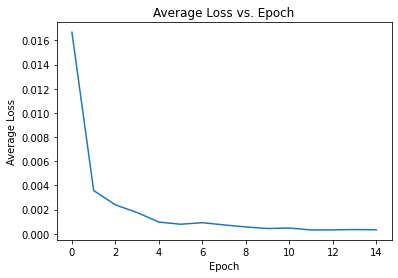

In [26]:
## Plot:
plt.plot(range(0, len(loss4)), loss4)
plt.title("Average Loss vs. Epoch")
plt.ylabel("Average Loss")
plt.xlabel("Epoch")
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [27]:
## Code:


def Test_Accuracy(model, test_data_loader):

  iters = 0
  correct = 0

  for images, labels in test_data_loader:

    images = images.view(-1, 28*28)
    labels = labels.float()
    y_predict = model(images)
    # Converting back to the 0, 1 labels
    y_predict_coded = y_predict.data.sign() / 2 + 0.5
    iters += labels.size(0)
    correct += (labels == y_predict_coded.view(-1).long()).sum().item()

  accuracy = correct / iters
  print("Accuracy is: ", accuracy)

In [28]:
Test_Accuracy(model4, test_loader)

Accuracy is:  0.9995271867612293


### 2. (20 points) Implement **Linear SVM** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [30]:
## Implementation of Linear SVM
## You can insert more code chunks and text cells if you want to.
## Your code:

# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 10

# Here is my special loss class:
class SVM_hinge(torch.nn.Module):

 def __init__(self):
   super(SVM_hinge,self).__init__()

 def forward(self, labels, y_predict):
   # Instead of feeding through an activation function, we'll just take the sign of the output
   y_predict = torch.mean(torch.clamp(1 - labels.t() * y_predict, min=0))
   return y_predict


# Training the Model

def hype_tune_SVM(num_epochs, lr, batch_size, momentum):
  print("")
  print(" >>>> Number of Epochs: ", num_epochs, " Learning Rate: ", lr, " Batch Size: ", batch_size, "<<<<")
  print("")

  ### Intantiating the model
  model = torch.nn.Linear(28*28, 1)

  ### I am going to use my hinge loss class
  criterion = SVM_hinge()
  iter = 0
  losses = list()
  optimizer = optim.SGD(model.parameters(),lr=lr, momentum = momentum)

  for epoch in range(num_epochs):

      epoch_losses = list()

      for i, (images, labels) in enumerate(train_loader):

          # Convert the 28*28 image matrix into a 784-dim vector
          images = images.view(-1, 28*28) 
          # Convert labels from 0,1 to -1,1 is necessary with Hinge Loss
          labels = 2*(labels.float()-0.5)
          labels = labels.float()
          
          ## TODO 

          # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
          optimizer.zero_grad()
          y_predict = model(images)
          # labels = labels.unsqueeze(1) 
          loss = criterion(y_predict, labels)

          # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch
          loss.backward()
          optimizer.step()
          
          iter += 1

          # 3. Save batch loss
          epoch_losses.append(loss.item()) 

      ## Save average epoch loss
      losses.append(np.average(epoch_losses))
      print('Epoch: {} :: Iteration: {} :: Loss: {}  '.format(epoch, iter, losses[-1], ))

  return losses, model


In [31]:
loss1_SVM, model1_SVM = hype_tune_SVM(10, 0.01, 64, 0.75)
loss2_SVM, model2_SVM = hype_tune_SVM(10, 0.1, 64, 0.75)
loss3_SVM, model3_SVM = hype_tune_SVM(10, 0.01, 64, 0.9)
loss4_SVM, model4_SVM = hype_tune_SVM(10, 0.1, 64, 0.9)



 >>>> Number of Epochs:  10  Learning Rate:  0.01  Batch Size:  64 <<<<

Epoch: 0 :: Iteration: 198 :: Loss: 0.013286388742577548  
Epoch: 1 :: Iteration: 396 :: Loss: 0.00382909941195388  
Epoch: 2 :: Iteration: 594 :: Loss: 0.002763893370601264  
Epoch: 3 :: Iteration: 792 :: Loss: 0.002113555586247733  
Epoch: 4 :: Iteration: 990 :: Loss: 0.001776341979175505  
Epoch: 5 :: Iteration: 1188 :: Loss: 0.0013254885185472291  
Epoch: 6 :: Iteration: 1386 :: Loss: 0.0012982834995997072  
Epoch: 7 :: Iteration: 1584 :: Loss: 0.0011069351863680463  
Epoch: 8 :: Iteration: 1782 :: Loss: 0.0009674362255015759  
Epoch: 9 :: Iteration: 1980 :: Loss: 0.0008733005714461659  

 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  64 <<<<

Epoch: 0 :: Iteration: 198 :: Loss: 0.033394253361179974  
Epoch: 1 :: Iteration: 396 :: Loss: 0.012167067596256131  
Epoch: 2 :: Iteration: 594 :: Loss: 0.007010018862219471  
Epoch: 3 :: Iteration: 792 :: Loss: 0.004341039453830683  
Epoch: 4 :: Iterat

I used the following resources in constructing this code: 

https://bytepawn.com/svm-with-pytorch.html

https://torchmetrics.readthedocs.io/en/stable/classification/hinge_loss.html

### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

In [32]:
list_of_losses_SVM = [loss1_SVM[-1], loss2_SVM[-1], loss3_SVM[-1], loss4_SVM[-1]]
min_loss_SVM = min(list_of_losses_SVM)
print(min_loss_SVM)
min_params_SVM = list_of_losses_SVM.index(min_loss_SVM)
print(min_params_SVM)

0.0002250429525068312
3


Answer: The lowest loss of those hyper-parameter combinations I tried occurred when number of epochs = 10, learning rate = 0.1, batch size = 64, and momentum  = 0.9.

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

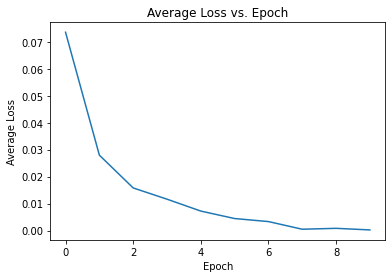

In [33]:
## Plot:

## Plot:
plt.plot(range(0, len(loss4_SVM)), loss4_SVM)
plt.title("Average Loss vs. Epoch")
plt.ylabel("Average Loss")
plt.xlabel("Epoch")
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [34]:
## Code:

Test_Accuracy(model4_SVM, test_loader)

Accuracy is:  0.9990543735224586


## Problem 2 (60 points)

In this problem you will practice implementing MLP and CNN to classify daily life images (CIFAR10).

**Data.** You will use CIFAR10 classification dataset (10 classes). Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [35]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.



import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

batch_size_cifar = 100
data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

train_loader_cifar, test_loader_cifar = cifar_loaders(batch_size_cifar)
print(len(train_loader_cifar.dataset))

Files already downloaded and verified
50000


### **Problem Description.**
### 1. (20 points) Implement a 7 layers fully-connected neural networks with ReLU activation to do image classification. 

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [48]:
class NeuralNet(nn.Module):

    def __init__(self):
      super(NeuralNet, self).__init__()
      # With a neural net we need to flatten
      self.flatten = nn.Flatten()
      self.feature = nn.Sequential(nn.Linear(3072,180), nn.ReLU(True), 
                                   nn.Linear(180,360), nn.ReLU(True),
                                   nn.Linear(360,200), nn.ReLU(True),
                                   nn.Linear(200,250), nn.ReLU(True),
                                   nn.Linear(250,80), nn.ReLU(True),
                                   nn.Linear(80,120), nn.ReLU(True),
                                   nn.Linear(120,10), nn.ReLU(True))

    def forward(self, x):
      x = self.feature(x)
      output = x
      return output

In [49]:
def hype_tune_NN(num_epochs, lr, batch_size, train_loader_cifar = train_loader_cifar):
  print("")
  print(" >>>> Number of Epochs: ", num_epochs, " Learning Rate: ", lr, " Batch Size: ", batch_size, "<<<<")
  print("")

  ### Intantiating the model
  model_NN = NeuralNet()
  model_NN.to(device)

  ### I am going to use the Binary Cross Entropy Loss for Logistic
  criterion = nn.CrossEntropyLoss()

  iter = 0
  losses = list()
  optimizer = optim.SGD(model_NN.parameters(),lr=lr)
  print("Starting for loop")

  for epoch in range(num_epochs):

      epoch_losses = list()

      for i, (images, labels) in enumerate(train_loader_cifar):

          ## TODO 

          # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
          # print(i, images.size())
          images = images.view(100, -1)

          # print(images.size())
          images = images.to(device)
          labels = labels.to(device)
          optimizer.zero_grad()
          y_predict = model_NN(images)
          loss = criterion(y_predict, labels)
          
          # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch
 
          loss.backward()
          optimizer.step()
          
          iter += 1

          # 3. Save batch loss
          epoch_losses.append(loss.item()) 

      ## Save average epoch loss
        # if (iter) % 64 == 0:
      losses.append(np.average(epoch_losses))
      print('Epoch: {} :: Iteration: {} :: Loss: {}  '.format(epoch, iter, losses[-1], ))

  return losses, model_NN

In [50]:
NN_losses, NN_mod = hype_tune_NN(10, 0.1, 100)
NN_losses2, NN_mod2 = hype_tune_NN(10, 0.01, 100)


 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.2751150403022766  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.1113530759811403  
Epoch: 2 :: Iteration: 1500 :: Loss: 1.910115234375  
Epoch: 3 :: Iteration: 2000 :: Loss: 1.8131835632324218  
Epoch: 4 :: Iteration: 2500 :: Loss: 1.7564674370288849  
Epoch: 5 :: Iteration: 3000 :: Loss: 1.7099139459133148  
Epoch: 6 :: Iteration: 3500 :: Loss: 1.5621167159080505  
Epoch: 7 :: Iteration: 4000 :: Loss: 1.5201233100891114  
Epoch: 8 :: Iteration: 4500 :: Loss: 1.4909598872661591  
Epoch: 9 :: Iteration: 5000 :: Loss: 1.468035308599472  

 >>>> Number of Epochs:  10  Learning Rate:  0.01  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.3026757760047913  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.3019942064285277  
Epoch: 2 :: Iteration: 1500 :: Loss: 2.3012231154441833  
Epoch: 3 :: Iteration: 2000 :: Loss: 2.2999197540283203  
Epoch: 4 :

Of the two sets of hyperparameters I tried with the fully-connected neural net, the one with 10 epochs, a learning rate of 0.1, and a batch size of 100 with no momentum had the lower loss.

Note: I used the following resources to create the NN Code:

https://www.kaggle.com/code/shadabhussain/cifar-10-cnn-using-pytorch

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html


### (a) (5 points) Print the model architecture.

In [51]:
## Print the model:
print(NeuralNet())

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (feature): Sequential(
    (0): Linear(in_features=3072, out_features=180, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=180, out_features=360, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=360, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=200, out_features=250, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=250, out_features=80, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=80, out_features=120, bias=True)
    (11): ReLU(inplace=True)
    (12): Linear(in_features=120, out_features=10, bias=True)
    (13): ReLU(inplace=True)
  )
)


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

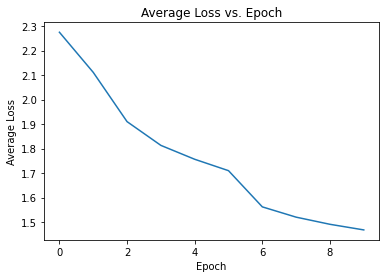

In [52]:
## Plot:

plt.plot(range(0, len(NN_losses)), NN_losses)
plt.title("Average Loss vs. Epoch")
plt.ylabel("Average Loss")
plt.xlabel("Epoch")
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [53]:
## Code:

def Test_Accuracy_NN(model, test_data_loader):

  iters = 0
  correct = 0

  for images, labels in test_data_loader:

    images = images.view(100, -1)
    images = images.to(device)
    labels = labels.to(device)
    labels = labels.float()
    y_predict = model(images)
     ## We take the output neuron with the highest predicted value
    max_index, y_pred_max = torch.max(y_predict, dim = 1)
    iters += labels.size(0)
    correct += (y_pred_max == labels).sum().item()

  accuracy = correct / iters
  print(f"Test Accuracy is: ", accuracy)


In [54]:
Test_Accuracy_NN(NN_mod, test_loader_cifar)

Test Accuracy is:  0.4821


### 2. (30 points) Implement a 7 layers CNN with 4 convolutional layers, 3 fully-connected layers and ReLU activation function. The input dimension of the 1st fully-connected layer must be 4096.

In [44]:
## Implementation of CNN
## You can insert more code chunks and text cells if you want to.
## Your code:

# We know images is torch.Size([63,3,32,32])

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3)
        self.pool = nn.MaxPool2d(2,2)
        self.pool3 = nn.MaxPool2d(3,3)
        self.dropout = nn.Dropout(0.15)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3)
        self.conv4 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3)
        self.fc1 = nn.Linear(4*32*32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = (F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = (F.relu(self.conv3(x)))  
        x = self.pool3(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        self.dropout(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x




In [45]:
def hype_tune_CNN(num_epochs, lr, batch_size, train_loader_cifar = train_loader_cifar):
  print("")
  print(" >>>> Number of Epochs: ", num_epochs, " Learning Rate: ", lr, " Batch Size: ", batch_size, "<<<<")
  print("")

  ### Instantiating the model
  model_CNN = CNN()
  model_CNN.to(device)

  ### I am going to use the Binary Cross Entropy Loss for Logistic
  criterion = nn.CrossEntropyLoss()

  iter = 0
  losses = list()
  optimizer = optim.SGD(model_CNN.parameters(),lr=lr)
  print("Starting for loop")

  for epoch in range(num_epochs):

      epoch_losses = list()

      for i, (images, labels) in enumerate(train_loader_cifar):

          ## TODO 

          # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
          # print(i, images.size())
          # images = images.view(100, -1)

          # print(images.size())
          # print(device)
          images = images.to(device)
          labels = labels.to(device)
          # print(images.device)
          # print(labels.device)
          # print(model_NN.device)
          optimizer.zero_grad()
          y_predict = model_CNN(images)
          loss = criterion(y_predict, labels)
          
          # 2. Do optimization. Chec torch.optim to see how to do optimization with pytorch

          loss.backward()
          optimizer.step()
          
          iter += 1

          # 3. Save batch loss
          epoch_losses.append(loss.item()) 

      ## Save average epoch loss
        # if (iter) % 64 == 0:
      losses.append(np.average(epoch_losses))
      print('Epoch: {} :: Iteration: {} :: Loss: {}  '.format(epoch, iter, losses[-1], ))


  return losses, model_CNN

In [46]:
CNN_losses, CNN_mod = hype_tune_CNN(10, 0.1, 100)


 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.1812491252422332  
Epoch: 1 :: Iteration: 1000 :: Loss: 1.895059068918228  
Epoch: 2 :: Iteration: 1500 :: Loss: 1.7144573636054992  
Epoch: 3 :: Iteration: 2000 :: Loss: 1.5593539731502533  
Epoch: 4 :: Iteration: 2500 :: Loss: 1.421438115119934  
Epoch: 5 :: Iteration: 3000 :: Loss: 1.3020122748613359  
Epoch: 6 :: Iteration: 3500 :: Loss: 1.2190733706951142  
Epoch: 7 :: Iteration: 4000 :: Loss: 1.1493120149374008  
Epoch: 8 :: Iteration: 4500 :: Loss: 1.0921173218488693  
Epoch: 9 :: Iteration: 5000 :: Loss: 1.0433399212360381  


In [47]:
CNN_losses2, CNN_mod2 = hype_tune_CNN(10, 0.01, 100)


 >>>> Number of Epochs:  10  Learning Rate:  0.01  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.2944551019668578  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.160778523683548  
Epoch: 2 :: Iteration: 1500 :: Loss: 2.013424638271332  
Epoch: 3 :: Iteration: 2000 :: Loss: 1.953555480480194  
Epoch: 4 :: Iteration: 2500 :: Loss: 1.90576544713974  
Epoch: 5 :: Iteration: 3000 :: Loss: 1.856375496864319  
Epoch: 6 :: Iteration: 3500 :: Loss: 1.806465538263321  
Epoch: 7 :: Iteration: 4000 :: Loss: 1.7455555057525636  
Epoch: 8 :: Iteration: 4500 :: Loss: 1.6956315703392029  
Epoch: 9 :: Iteration: 5000 :: Loss: 1.6646231994628906  


Again, we see that between the two sets of hyperparameters I chose here, the model with the lower loss after 10 epochs is the one with the higher learnning rate of 0.1 (CNN_mod) instead of 0.01.

### (a) (5 points) Print the model architecture.

In [60]:
## Print the model:

print(CNN())

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.15, inplace=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4096, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

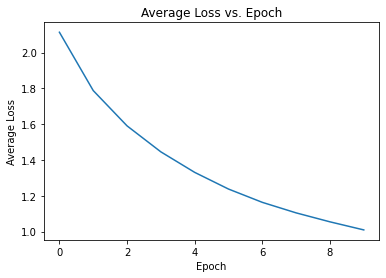

In [72]:
## Plot:

plt.plot(range(0, len(CNN_losses)), CNN_losses)
plt.title("Average Loss vs. Epoch")
plt.ylabel("Average Loss")
plt.xlabel("Epoch")
plt.show()

### (c) (5 points) Report the final testing accuracy of trained model.

In [58]:
## Code:

def Test_Accuracy_CNN(CNN_mod = CNN_mod, test_loader_cifar = test_loader_cifar):

  #Since we're doing prediction, we don't need to calculate the gradient
  with torch.no_grad():

    iters = 0
    correct = 0

    for images, labels in test_loader_cifar:

      # images = images.view(100, -1)
      images = images.to(device)
      labels = labels.to(device)
      labels = labels.float()
      y_predict = CNN_mod(images)
      ## We take the output neuron with the highest predicted value
      max_index, y_pred_max = torch.max(y_predict, dim = 1)
      iters += labels.size(0)
      correct += (y_pred_max == labels).sum().item()

    accuracy = correct / iters
    print(f"Test Accuracy is: ", accuracy)

In [74]:
Test_Accuracy_CNN()

Test Accuracy is:  0.6848


### (d) (10 points) Write a new cifar$\_$loaders function to try different data augmentation methods.

In [55]:
## Code:


# Here I will define a few different sets of transforms that could be used to augment the data. 

from torchvision.transforms import Compose 

train_transform_1 = Compose([ 
    transforms.RandomVerticalFlip(p=0.75),
    transforms.ToTensor(),
    transforms.Normalize([0, 0, 0], [1, 1, 1])
])

train_transform_2 = Compose([ transforms.RandomPerspective(75),
                             #This randomly inverts pixels above a certain value
                             transforms.RandomSolarize(0.1, 0.5),
                             transforms.ToTensor(),
                             transforms.Normalize([0, 0, 0], [1, 1, 1])
])


def cifar_loaders_transform(batch_size, transformations, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    
    ### Here is where you can use different transforms!
    train = datasets.CIFAR10(data_dir, train=True, download=True, 
        transform=transformations)
    
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize([0, 0, 0], [1, 1, 1])]))
    

    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

train_loader_cifar2, test_loader_cifar2 = cifar_loaders_transform(batch_size_cifar, train_transform_1)
train_loader_cifar3, test_loader_cifar3 = cifar_loaders_transform(batch_size_cifar, train_transform_2)

Files already downloaded and verified
Files already downloaded and verified


In [56]:
CNN_losses2, CNN_mod2 = hype_tune_CNN(10, 0.1, 100, train_loader_cifar2)


 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.3003194789886474  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.138669214248657  
Epoch: 2 :: Iteration: 1500 :: Loss: 1.9141116499900819  
Epoch: 3 :: Iteration: 2000 :: Loss: 1.7911286563873292  
Epoch: 4 :: Iteration: 2500 :: Loss: 1.6527294149398803  
Epoch: 5 :: Iteration: 3000 :: Loss: 1.5085359511375427  
Epoch: 6 :: Iteration: 3500 :: Loss: 1.4187828249931336  
Epoch: 7 :: Iteration: 4000 :: Loss: 1.3219720336198806  
Epoch: 8 :: Iteration: 4500 :: Loss: 1.2539794957637787  
Epoch: 9 :: Iteration: 5000 :: Loss: 1.1802804691791535  


In [59]:
Test_Accuracy_CNN(CNN_mod2, test_loader_cifar2)

Test Accuracy is:  0.5087


In [60]:
CNN_losses3, CNN_mod3 = hype_tune_CNN(10, 0.1, 100, train_loader_cifar3)


 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.3030995383262636  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.3028348479270937  
Epoch: 2 :: Iteration: 1500 :: Loss: 2.302688429355621  
Epoch: 3 :: Iteration: 2000 :: Loss: 2.301919527053833  
Epoch: 4 :: Iteration: 2500 :: Loss: 2.298336494922638  
Epoch: 5 :: Iteration: 3000 :: Loss: 2.2896360516548158  
Epoch: 6 :: Iteration: 3500 :: Loss: 2.2638634276390075  
Epoch: 7 :: Iteration: 4000 :: Loss: 2.185349744319916  
Epoch: 8 :: Iteration: 4500 :: Loss: 2.126018327951431  
Epoch: 9 :: Iteration: 5000 :: Loss: 2.092679036617279  


In [61]:
Test_Accuracy_CNN(CNN_mod3, test_loader_cifar3)

Test Accuracy is:  0.348


In [43]:
NN_losses2, NN_mod2 = hype_tune_NN(10, 0.1, 100, train_loader_cifar2)


 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.3015249142646788  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.210594249486923  
Epoch: 2 :: Iteration: 1500 :: Loss: 2.0808105742931366  
Epoch: 3 :: Iteration: 2000 :: Loss: 1.9768878843784332  
Epoch: 4 :: Iteration: 2500 :: Loss: 1.8953319025039672  
Epoch: 5 :: Iteration: 3000 :: Loss: 1.8401395168304444  
Epoch: 6 :: Iteration: 3500 :: Loss: 1.793049777507782  
Epoch: 7 :: Iteration: 4000 :: Loss: 1.7479873497486114  
Epoch: 8 :: Iteration: 4500 :: Loss: 1.71213317155838  
Epoch: 9 :: Iteration: 5000 :: Loss: 1.6792094604969026  


In [48]:
Test_Accuracy_NN(NN_mod2, test_loader_cifar2)

Accuracy is:  0.3599


In [62]:
NN_losses3, NN_mod3 = hype_tune_NN(10, 0.1, 100, train_loader_cifar3)


 >>>> Number of Epochs:  10  Learning Rate:  0.1  Batch Size:  100 <<<<

Starting for loop
Epoch: 0 :: Iteration: 500 :: Loss: 2.3026629786491393  
Epoch: 1 :: Iteration: 1000 :: Loss: 2.302585841178894  
Epoch: 2 :: Iteration: 1500 :: Loss: 2.3025858402252197  
Epoch: 3 :: Iteration: 2000 :: Loss: 2.3025858306884768  
Epoch: 4 :: Iteration: 2500 :: Loss: 2.3025858402252197  
Epoch: 5 :: Iteration: 3000 :: Loss: 2.3025858402252197  
Epoch: 6 :: Iteration: 3500 :: Loss: 2.302585841178894  
Epoch: 7 :: Iteration: 4000 :: Loss: 2.302585841178894  
Epoch: 8 :: Iteration: 4500 :: Loss: 2.3025858402252197  
Epoch: 9 :: Iteration: 5000 :: Loss: 2.3025858402252197  


There is some interesting behavior in the loss function here -- it seems that a local minimum or some other type of "rut" is reached and the descent function doesn't move any further. This might be interesting to look into further at a later point, but for now won't change the ain conclusion we'll draw here about the relative improved performance of CNN compared to NN on transformed or augmented data.



In [64]:
Test_Accuracy_NN(NN_mod3, test_loader_cifar3)

Test Accuracy is:  0.1



Answer: Above I ran both the MLP and the CNN on the augmented data using the set of transformations in 'train_transform_1' as above. The second set of transforms I created resulted in very low accuracy for both MLP (0.1) and CNN (0.348) when compared to the first set of tranforms I created (which had accuracy of 0.3599 for MLP and 0.5087 for CNN, respectively). However, all of these accuracies were still lower than that which I achieved with the set of transforms given in the original loaders in the homework. This exercise demonstrates the importance of data augmentation in the overall performance of the model.

I used this website to learn more about data augmentation for CNN and MLPs: 

https://medium.com/swlh/how-data-augmentation-improves-your-cnn-performance-an-experiment-in-pytorch-and-torchvision-e5fb36d038fb

https://www.tutorialspoint.com/pytorch-torchvision-transforms-gaussianblur

### 3. (10 points) Please compare the results of the two models (MLP and CNN).

Answer:

Overall, the CNN performed better than MLP on the data set with the transformations provided in the homework. Over the course of the homework, I tried several different combinations of optimizers and hyper-parameters. In every circumstance, including the final hyper-parameters that I selected and reported here, the fully connected neural network had a lower overall accuracy (0.4821) on the test data than the convolutional neural network (0.6848). 

When I used my own transforms, both the MLP and the CNN performed more poorly overall. In all cases, however, the CNN performs better than the MLP, even with the transforms that seemed to diminish the behavior of all models.

It makes sense that the CNN would perform better on image data because it is designed to pick up on image-related features (i.e. edges) through it's kernels and pooling layers, which serve to reduce dimensionality. There are certain tasks which a fully-connected network might perform better on than a CNN, but according to the resources I found on the web, it's typical for a CNN to outperform a full-connected NN when image data is being used.

I referenced this website in writing my answer: https://medium.datadriveninvestor.com/why-are-convolutional-neural-networks-good-for-image-classification-146ec6e865e8